In [12]:
import pandas as pd
import re 
import matplotlib.pyplot as plt
import seaborn as sns

Limpieza de datos

In [9]:
# Leer el archivo CSV
df = pd.read_csv('baseball_reference_2016_scrape.csv')

# Eliminar columnas innecesarias
df = df.drop(columns=['boxscore_url', 'other_info_string'])

# Limpiar los valores NaN eliminando las filas que los contienen en la columna 'attendance'
df = df.dropna(subset=['attendance'])

# Convertir la columna de fecha a formato datetime
df['date'] = pd.to_datetime(df['date'])

# Extraer componentes útiles de la fecha como día de la semana y hora
df['weekday'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour

# Quitar comillas y corchetes de la columna 'attendance' y convertir a entero
df['attendance'] = df['attendance'].str.replace('[^\d]', '', regex=True).replace('', '0').astype(int)

# Mostrar las primeras filas del DataFrame limpio
print(df.head())

   attendance              away_team  away_team_errors  away_team_hits  \
0       40030          New York Mets                 1               7   
1       21621  Philadelphia Phillies                 0               5   
2       12622        Minnesota Twins                 0               5   
3       18531   Washington Nationals                 0               8   
4       18572       Colorado Rockies                 1               8   

   away_team_runs       date  field_type game_duration             game_type  \
0               3 2016-04-03         NaN        : 3:13  Night Game, on grass   
1               2 2016-04-06         NaN        : 2:23  Night Game, on grass   
2               2 2016-04-06         NaN        : 3:11  Night Game, on grass   
3               3 2016-04-06         NaN        : 2:53  Night Game, on grass   
4               4 2016-04-06         NaN        : 2:39    Day Game, on grass   

              home_team  home_team_errors  home_team_hits  home_team_runs 

1.1 Analisis de datos

In [15]:
print("Tipos de cada variable:")
print(df.dtypes)
print("\n")

Tipos de cada variable:
attendance                   int32
away_team                   object
away_team_errors             int64
away_team_hits               int64
away_team_runs               int64
date                datetime64[ns]
field_type                 float64
game_duration               object
game_type                   object
home_team                   object
home_team_errors             int64
home_team_hits               int64
home_team_runs               int64
start_time                  object
venue                       object
weekday                     object
hour                         int32
dtype: object




In [14]:
print("Resumen del conjunto de datos:")
print(df.describe())
print("\n")

Resumen del conjunto de datos:
         attendance  away_team_errors  away_team_hits  away_team_runs  \
count   2463.000000       2463.000000     2463.000000     2463.000000   
mean   30333.711328          0.580593        8.764515        4.413723   
min        0.000000          0.000000        1.000000        0.000000   
25%    22385.000000          0.000000        6.000000        2.000000   
50%    30599.000000          0.000000        8.000000        4.000000   
75%    38384.500000          1.000000       11.000000        6.000000   
max    54449.000000          5.000000       22.000000       21.000000   
std     9926.156201          0.793391        3.511581        3.104556   

                                date  field_type  home_team_errors  \
count                           2463         0.0       2463.000000   
mean   2016-07-05 11:00:39.464068096         NaN          0.585871   
min              2016-04-03 00:00:00         NaN          0.000000   
25%              2016-05-20 00:

variables numéricas 

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


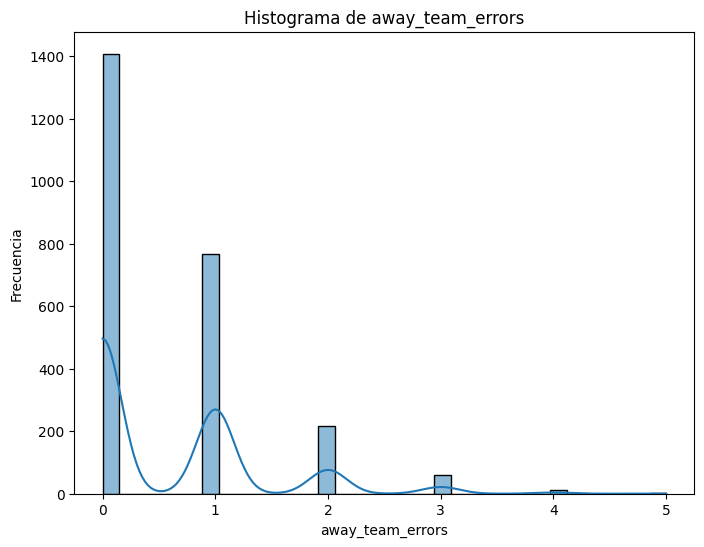

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


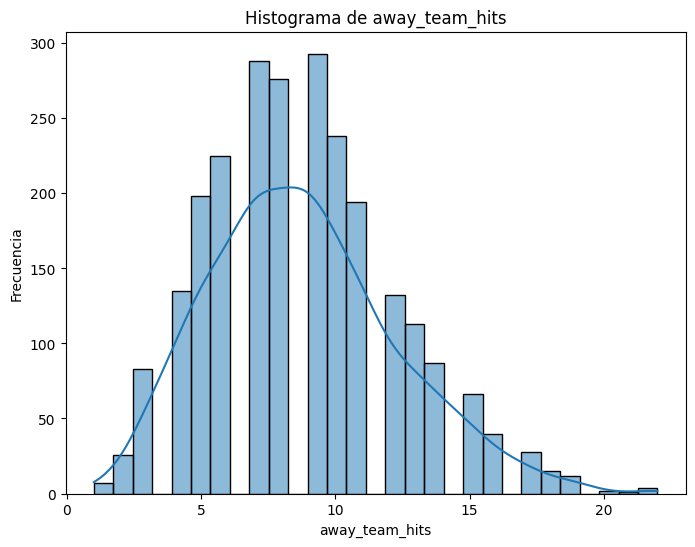

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


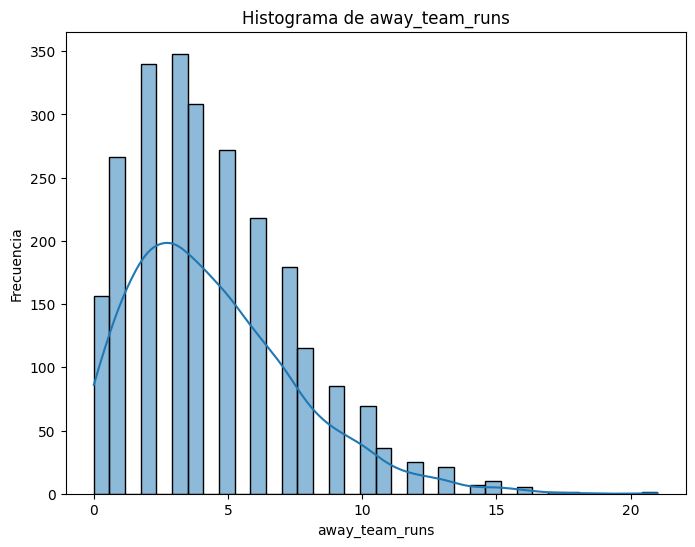

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


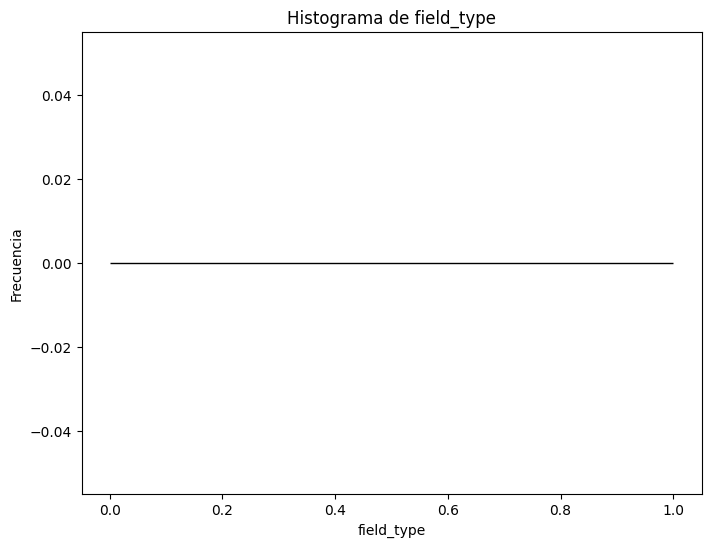

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


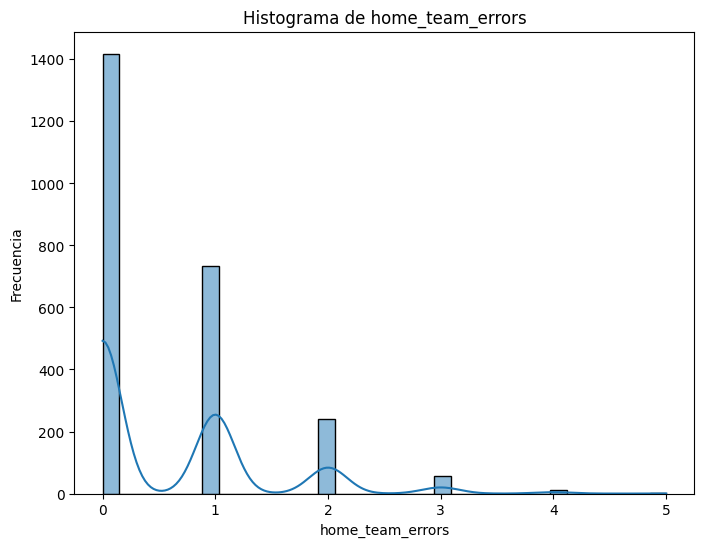

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


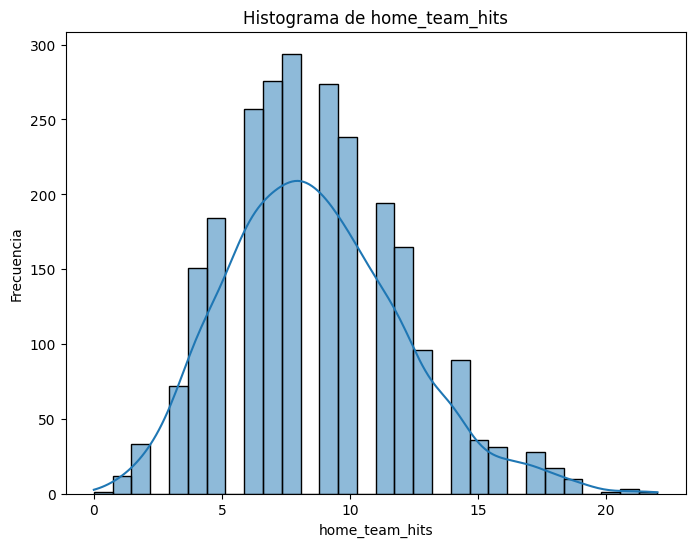

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


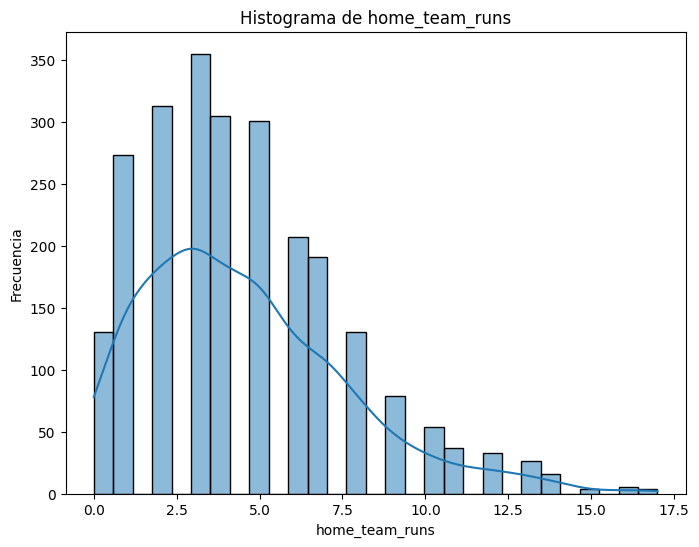

In [13]:
numeric_variables = df.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

Variables Categóricas

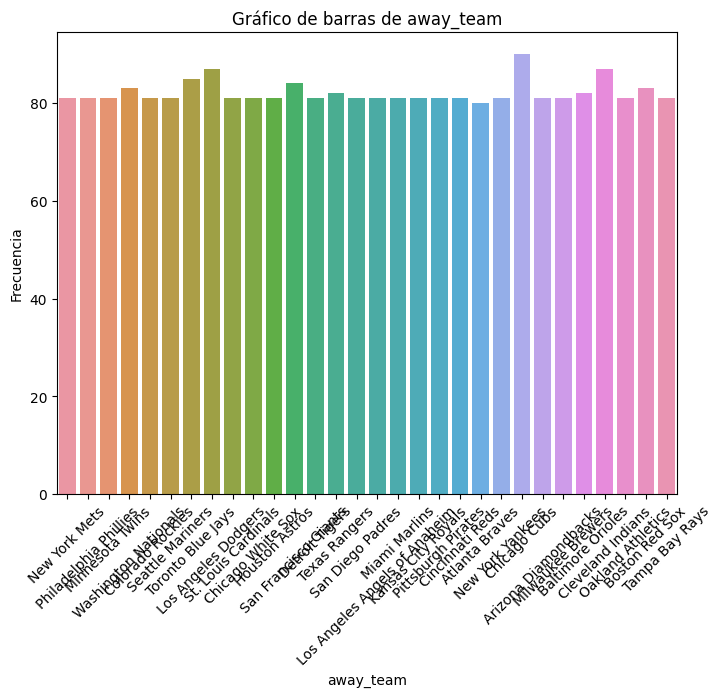

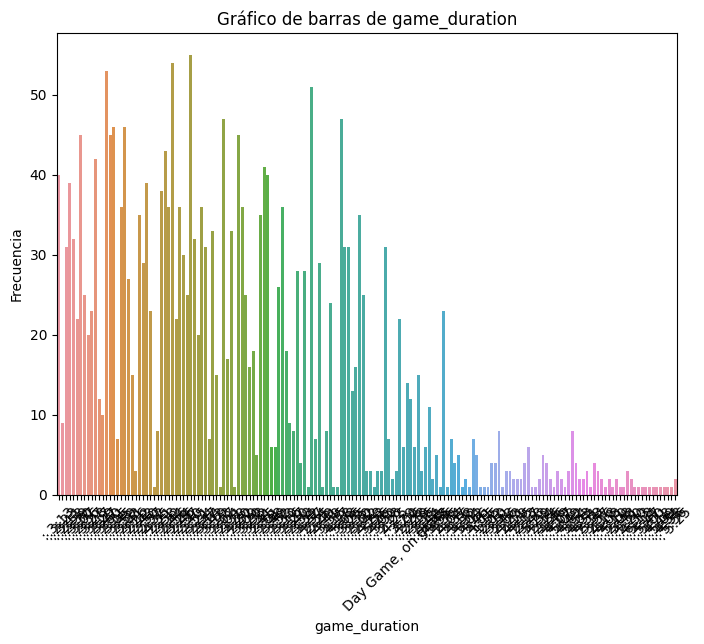

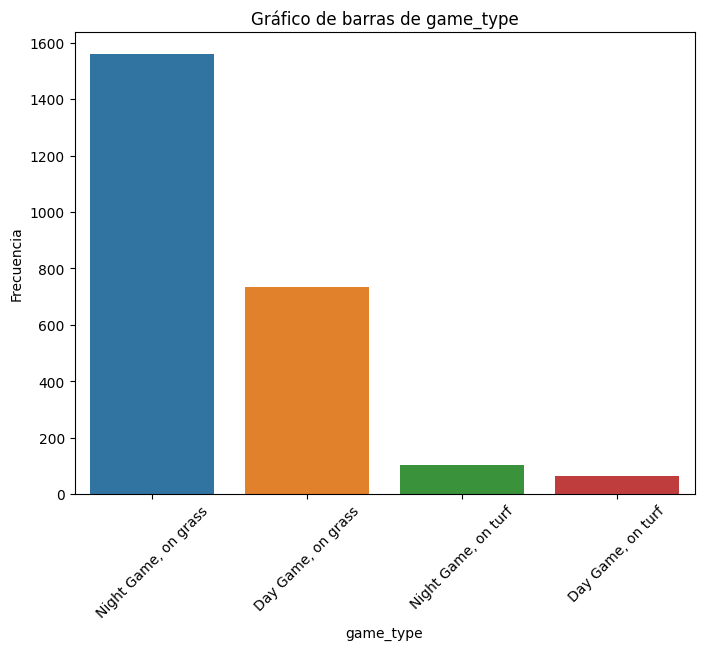

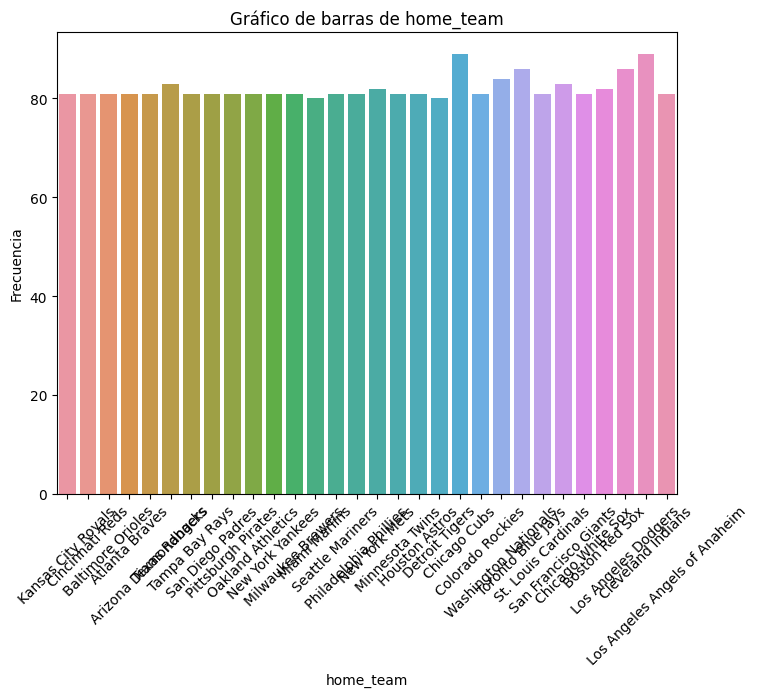

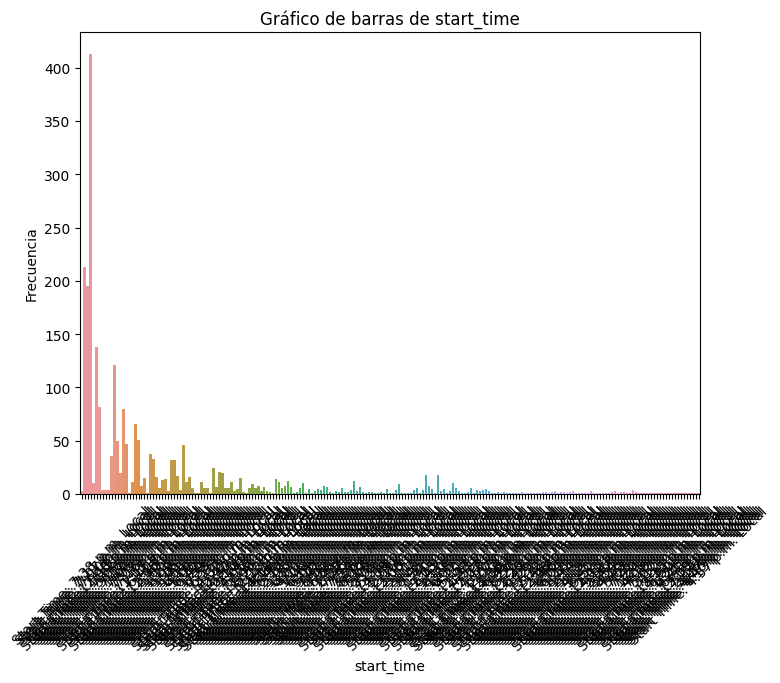

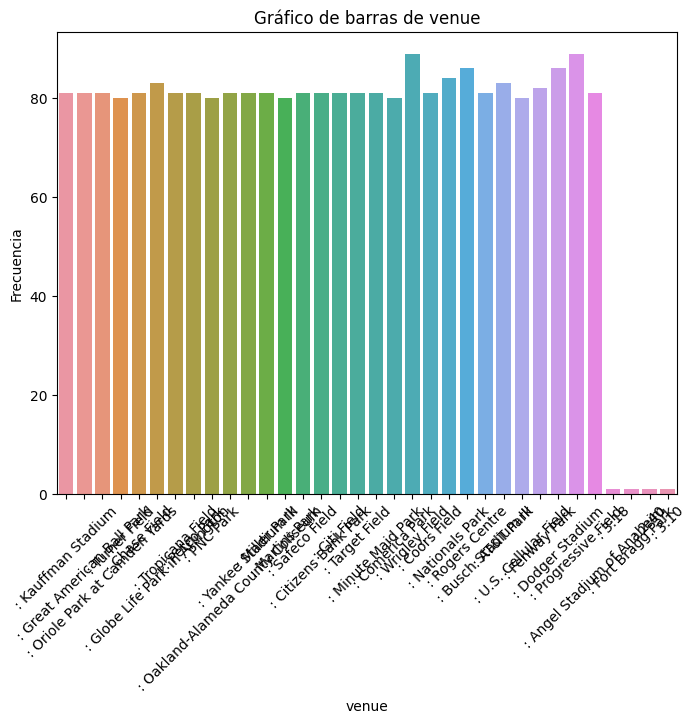

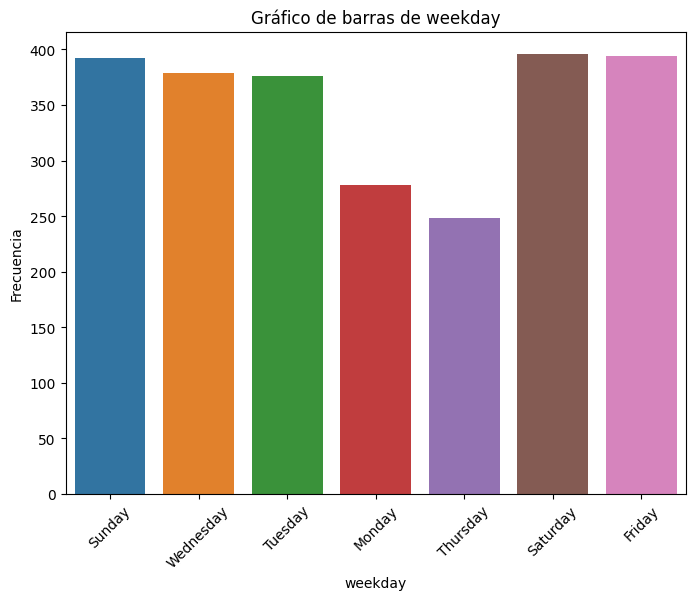

In [16]:
categorical_variables = df.select_dtypes(include=['object']).columns
for column in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Gráfico de barras de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

análisis de correlación entre variables categóricasy numéricas


In [17]:
correlation_matrix = df[numeric_variables].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

ValueError: could not convert string to float: 'New York Mets'